# Chapter 13 Exercises

In [2]:
import numpy as np

import statsmodels.formula.api as smf

import scipy.stats

import matplotlib.pyplot as plt

import rpy2.robjects as robjects
from rpy2.robjects.conversion import localconverter
from rpy2.robjects import pandas2ri

## Conceptual Exercises

### Exercise 1
Suppose we test $m$ null hypotheses, all of which are true.  We control the Type I error for each null hypothesis at level $\alpha$.  For each sub-problem, justify your answer.

#### 1a) In total, how many Type I errors do we expect to make?

Since $\alpha$ is the probability of make a Type I error, we would expect to make $\alpha \cdot m$ Type I errors (see pg 561).

#### 1b) Suppose that $m$ tests that we perform are independent.  What is the family-wise error rate associated with these $m$ tests?

*Hint: If two events $A$ and $B$ are independent, then $Pr(A \cap B) = Pr(A)Pr(B)$*

Under our assumptions that the $m$ hypothesis tests are independent and all $m$ hypotheses are true, the family-wise error rate would be as follows:

$$FWER = Pr(\text{At least one Type I error})$$
$$ = 1 - Pr(\text{No Type I errors})$$
$$ = 1 - Pr(\text{do not falsely reject any null hypotheses})$$
$$ = 1 - Pr(\cap_{j=1}^{m}\{\text{do not falsely reject } H_{0j}\})$$

$$FWER(\alpha) = 1 - \prod_{j=1}^{m}(1-\alpha) = 1-(1-\alpha)^m$$

(see pg 562)

#### 1c) Suppose that $m=2$, and that the $p$-values for the two tests are positively correlated, so that if one is small then the other will tend to be small as well, and if one is large then the other will tend to be large.  How does the family-wise error rate associated with these $m=2$ tests qualitatively compare to the answer in (b) with $m=2$?
*Hint: First, suppose that the two p-values are perfectly correlated.*

**From 1b):** If $m=2$ and the hypothesis tests are independent, then the family-wise error rate (FWER) would be as follows:

$$FWER(\alpha) = 1 - (1-\alpha)^2$$
$$=1-(1-2\alpha+\alpha^2)$$
$$=2\alpha-\alpha^2$$

The sample space for the FWER of these $m=2$ independent hypothesis tests is as follows:
1) Reject both null hypotheses, leading to two Type 1 errors.
2) Reject one null hypothesis and fail to reject the other, leading to one Type I error.  This could happen two different ways;
   * Reject $H_{01}$ and fail to reject $H_{02}$
   * Reject $H_{02}$ and fail to reject $H_{01}$

Under the assumption that the two $p$-values are perfectly correlated, they will have the same value, and if we reject one null hypothesis, we're guaranteed to reject the other as well.  This means it would be impossible to reject just one null hypothesis.  

In this case, the sample space for the FWER would only contain the event where both null hypotheses are rejected. As such, the sample space is smaller and the FWER rate will be lower for the $m=2$ perfectly correlated hypothesis tests as compared to the $m=2$ independent hypothesis tests.  

$$FWER(\text{independent } p\text{-values}) >FWER(\text{perfectly correlated } p\text{-values})$$
$$Pr(\text{rejecting at least one null hypothesis}) > Pr(\text{rejecting both null hypotheses})$$
$$2\alpha-\alpha^2 > Pr(\text{rejecting both null hypotheses})$$

This is ilustrated in the graph below where the FWER for the perfectly correlated $p$-values are always below the FWER for the independent $p$-values:

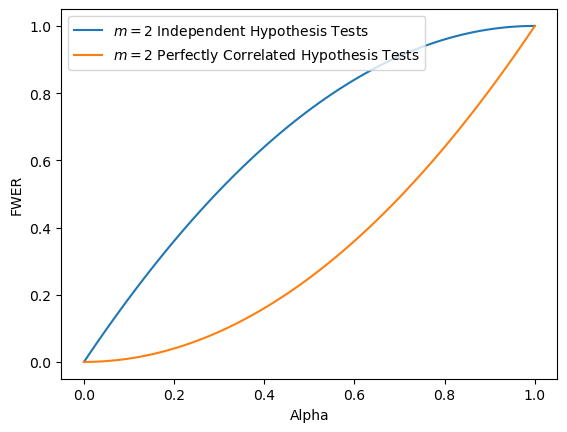

In [21]:
alphas = np.linspace(0,1,100)
ind_fwers = 1-(1-alphas)**2
dep_fwers = xs**2

plt.plot(alphas, ind_fwers, label=r'$m=2$ Independent Hypothesis Tests')
plt.plot(alphas, dep_fwers, label=r'$m=2$ Perfectly Correlated Hypothesis Tests')
plt.xlabel('Alpha')
plt.ylabel('FWER')
plt.legend(loc='best');

On the other hand, if the two $p$-values are positively correlated, but not perfectly correlated, then the $p$-values will be similar, but not necessarily the same.  

Like before, if both $p$-values are lower than $\alpha$, then we would be reject both null hypotheses and be committing two Type I errors, but now there could be a case where one $p$-value is lower than $\alpha$ and one p-value is higher than $\alpha$.  When this happens, we would be rejecting only one null hypothesis and committing only one Type I error.  While this means there are now more ways to commit a Type 1 error, there won't be as many ways as compared to when the $p$-values are truly independent.  

Regardless of whether the $p$-values are perfectly correlated, or positively correlated, the FWER should be smaller than the FWER when the $p$-values are independent.

#### 1d) Suppose again that $m=2$, but that now the $p$-values for the two tests are negatively correlated, so that if one is large then the other will tend to be small.  How does the family-wise error rate associated with these $m=2$ tests qualitatively compare to the answer in (b) with $m=2$?
*Hint: First, suppose that whenever one p-value is less than $\alpha$, then the other will be greater than $\alpha$.  In other words, we can never reject both null hypotheses.*

As mentioned before, the sample space for the FWER of these $m=2$ independent hypothesis tests is as follows:
1) Reject both null hypotheses, leading to two Type 1 errors.
2) Reject one null hypothesis and fail to reject the other, leading to one Type I error.  This could happen two different ways;
   * Reject $H_{01}$ and fail to reject $H_{02}$
   * Reject $H_{02}$ and fail to reject $H_{01}$

Under the assumption that if the $p$-values are negatively correlated and if one is less than $\alpha$ the other will be greater than $\alpha$, it will be impossible to reject both null hypotheses at the same time.  Therefore, the sample space for the negatively correlated $p$-values is smaller and thus the FWER is lower than when the $p$-values of the hypotheses tests are independent.

$$FWER(\text{independent } p\text{-values}) >FWER(\text{negatively correlated } p\text{-values})$$
$$Pr(\text{rejecting at least one null hypothesis}) > Pr(\text{rejecting exactly one null hypothesis})$$
$$2\alpha-\alpha^2 > Pr(\text{rejecting exactly one null hypothesis})$$

If we loosen the restriction and allow for such cases where both $p$-values could be above $\alpha$ or both below $\alpha$, there will be less ways for this to happen as compared to when the $p$-values are truly independent.  No matter what, we should expect the FWER to be lower for negatively correlated $p$-values.

### Exercise 2
Suppose that we test $m$ hypotheses, and control the Type I error for each hypothesis at level $\alpha$.  Assume that all $m$ $p$-values are independent, and that all null hypotheses are true.

#### 2a) Let the random variable $A_j$ equal 1 if the $j$th null hypothesis is rejected, and 0 otherwise.  What is the distribution of $A_j$?

$$A_j=\begin{cases}
  1 & \text{if }p\leq \alpha\\    
  0 & \text{if }p>\alpha    
\end{cases}$$

$A_j $~$ B(1, \alpha$) and would follow a binomial distribution because:
* There are a fixed number of trials, in this case $m=1$ trials.
* There are only two outcomes for each trial, reject $H_0$ or fail to reject $H_0$.
* The trials are assumed to be independent.
* The probability of success ($\alpha$) is the same for each trial.

#### 2b) What is the distribution of $\sum_{j=1}^{m}A_j$?

$\sum_{j=1}^{m}A_j$ ~ $B(m,\alpha)$ and would follow a binomial distribution because:
* There are a fixed number of trials, in this case $m$ trials.
* There are only two outcomes for each trial, reject $H_0$ or fail to reject $H_0$.
* The trials are assumed to be independent.
* The probability of success ($\alpha$) is the same for each trial.

#### 2c) What is the standard deviation of the number of Type I errors that we will make?

For a binomial (Bernoulli) distribution, the standard deviation can be found using the formula $\sigma=\sqrt{np(1-p)}$, where $n$ is the number of trials and $p$ is the probability of success for each trial.

$$\sigma=\sqrt{np(1-p)}=\sqrt{m\alpha(1-\alpha)}$$

### Exercise 3

Suppose we test $m$ null hypotheses, and control the Type I error for the $j$th null hypotheses at level $\alpha_j$, for $j=1,...,m$.  Argue that the family-wise error rate is no greater than $\sum_{j=1}^{m}\alpha_j$.

**Need to come back to this problem and finish**

### Exercise 4
Suppose we test $m=10$ hypotheses, and obtain the $p$-values shown in Table 13.4
![image](./images/tbl_13_4.png)

#### 4a) Suppose we wish to control the Type I error for each null hypothesis at level $\alpha = 0.05$.  Which null hypotheses will we reject?

We would reject any null hypothesis where the $p$-value $\leq 0.05$.  This means $H_{01}, H_{02}, H_{03}, H_{08}, H_{09}, \text{ and } H_{10}$ would be rejected.

#### 4b) Now suppose that we wish to control the FWER at level $\alpha = 0.05$.  Which null hypotheses will we reject?  Justify your answer.

##### Using the Bonferroni method:
The Bonferroni method sets the threshold for rejecting any null hypothesis where the $p$-value $\leq \frac{\alpha}{m}$.

We would therefore reject any null hypothesis where the $p$-value $\leq \frac{0.05}{10}$.  In other words, when the $p$-value $\leq 0.005$.  This means we would reject $H_{01}, H_{09}, H_{10}$.

##### Using Holm's Step-Down Procedure:

First, we have to order the $p$-values in ascending order, such that $p_{(1)}\leq p_{(2)}\leq...\leq p_{(m)}$.

In [2]:
p_vals = [0.0011, 0.031, 0.017, 0.32, 0.11, 0.90, 0.07, 0.006, 0.004, 0.0009]
p_vals_sorted = sorted(p_vals)
p_vals_sorted

[0.0009, 0.0011, 0.004, 0.006, 0.017, 0.031, 0.07, 0.11, 0.32, 0.9]

Then, we have to find L, such that:
$$ L = \text{min}\Bigl\{j:p_{(j)}>\frac{\alpha}{m+1-j}\Bigr\}$$

In [3]:
alpha = 0.05
m = len(p_vals_sorted)

# thresholds = np.array([])

L = 0

for j, p_val in enumerate(p_vals_sorted, 1):
    # threshold = alpha / (m + 1 - j)
    # thresholds = np.append(thresholds, threshold)
    if p_val > alpha / (m + 1 - j):
        L = j
        break

print(f"L = {L}")

L = 5


Lastly, we reject all null hypotheses $H_{0j}$ for which $p_j<p_{(L)}$.

Therefore we should reject the null hypotheses corresponding to $p_{(1)}, p_{(2)}, p_{(3)}, \text{ and } p_{(4)}$, which means rejecting $H_{10}, H_{01}, H_{09}, \text{ and } H_{08}$.

#### 4c) Now suppose that we wish to control the FDR at level $q=0.05$.  Which null hypotheses will we reject?  Justify your answer.

##### Using the Benjamini-Hochberg Procedure:

First, we have to order the $p$-values in ascending order, such that $p_{(1)}\leq p_{(2)}\leq...\leq p_{(m)}$.  This has already been done in 4b).

Next, we have to find L, such that:

$$L=\text{max}\{j:p_{(j)}<qj/m\}$$

In [4]:
q = 0.05

# thresholds = np.array([])

L = 0

for j, p_val in enumerate(p_vals_sorted, 1):
    # threshold = q * j / m
    # thresholds = np.append(thresholds, threshold)
    # print(j)
    if p_val < q * j / m:
        L = j
    else:
        break

print(f"L = {L}")

L = 5


Lastly, we reject all null hypotheses $H_{0j}$ for which $p_j \leq p_{(L)}$.

Therefore we should reject the null hypotheses corresponding to $p_{(1)}, p_{(2)}, p_{(3)}, p_{(4)}, \text{ and } p_{(5)}$, which means rejecting $H_{10}, H_{01}, H_{09}, H_{08}, \text{ and } H_{03}$.

#### 4d) Now suppose that we wish to control the FDR at level $q=0.2$.  Which null hypotheses will we reject?  Justify your answer.

In [5]:
q = 0.2

L = 0

for j, p_val in enumerate(p_vals_sorted, 1):
    if p_val < q * j / m:
        L = j
    else:
        break

print(f"L = {L}")

L = 8


We should reject the null hypotheses corresponding to $p_{(1)}, p_{(2)}, p_{(3)}, ..., \text{ and } p_{(8)}$, which means rejecting all but $H_{04}$ and $H_{06}$.

#### 4e) Of the null hypotheses rejected at FDR level $q=0.2$, approximately how many are false positves?  Justify your answer.

The Benjamini-Hochberg procedure ensures that no more than a fraction $q$ of the rejected null hypotheses are false positives.  At $q=0.2$, 8 null hypotheses were rejected and we would expect no more than $0.2 \cdot 8 = 1.6$ of the rejected null hypotheses to be false positives.

### Exercise 5
For this problem, you will make up $p$-values that lead to a certain number of rejections using the Bonferroni and Holm procedures.

#### 5a) Give an example of five $p$-values (i.e. five numbers between 0 and 1 which, for the purpose of this problem, we will interpret as $p$-values) for which both Bonferroni's method and Holm's method reject exactly one null hypothesis when controlling the FWER at level 0.1.

One possible set of $p$-values where only one null hypothesis would be rejected with both the Bonferroni and Holm method could be: 0.01, 0.03, 0.04, 0.06, and 0.2.

##### Bonferroni's Method

In [6]:
p_vals = [0.01, 0.03, 0.04, 0.06, 0.2]

alpha = 0.1
m = 5

bonferonni_threshold = alpha / m

In [7]:
for p_val in p_vals:
    if p_val <= bonferonni_threshold:
        print("Reject H0")
    else:
        print("Fail to reject H0")

Reject H0
Fail to reject H0
Fail to reject H0
Fail to reject H0
Fail to reject H0


##### Holm's Method

In [8]:
for j, p_val in enumerate(p_vals, 1):
    holm_threshold = alpha / (m + 1 - j)
    if p_val <= holm_threshold:
        print("Reject H0")
    else:
        print("Fail to reject H0")

Reject H0
Fail to reject H0
Fail to reject H0
Fail to reject H0
Fail to reject H0


#### 5b) Now give an example of five $p$-values for which Bonferroni rejects one null hypothesis and Holm rejects more than one null hypothesis at level 0.1.

One possible set of $p$-values where only one null hypothesis would be rejected with both the Bonferroni and Holm method could be: 0.01, 0.022, 0.04, 0.06, 0.2.

In [9]:
p_vals = [0.01, 0.022, 0.04, 0.06, 0.2]

##### Bonferroni's Method

In [10]:
for p in p_vals:
    if p <= bonferonni_threshold:
        print("Reject H0")
    else:
        print("Fail to reject H0")

Reject H0
Fail to reject H0
Fail to reject H0
Fail to reject H0
Fail to reject H0


##### Holm's Method

In [11]:
for j, p in enumerate(p_vals, 1):
    holm_threshold = alpha / (m + 1 - j)
    if p <= holm_threshold:
        print("Reject H0")
    else:
        print("Fail to reject H0")

Reject H0
Reject H0
Fail to reject H0
Fail to reject H0
Fail to reject H0


### Exercise 6


![image](./images/fig_13_3.png)

For each of the three panels in Figure 13.3, answer the following questions:

#### 6a) How many false positives, false negatives, true positives, true negatives, Type I errors, and Type II errors result from applying the Bonferroni procedure to control the FWER at level $\alpha = 0.05$?

**Note: V, W, S, and U refer to the language on pg 562.**

Left Panel:

* V - False Positives (# of True $H_0$ that were incorrectly rejected): 0
  * Any black dot below the black line
* W - False Negatives (# of False $H_0$ that were incorrectly not rejected): 1
  * Any red dot above the black line
* S - True Positives (# of False $H_0$ that were correctly rejected): 7
  * Any red dot below the black line
* U - True Negatives (# of True $H_0$ that were correctly not rejected): 2
  * Any black dot above the black line
* Type I Errors (Also known as False Positive): 0
* Type II Errors (Also known as False Negative): 1

Middle Panel:

* V - False Positives (# of True $H_0$ that were incorrectly rejected): 0
  * Any black dot below the black line
* W - False Negatives (# of False $H_0$ that were incorrectly not rejected): 1
  * Any red dot above the black line
* S - True Positives (# of False $H_0$ that were correctly rejected): 7
  * Any red dot below the black line
* U - True Negatives (# of True $H_0$ that were correctly not rejected): 2
  * Any black dot above the black line
* Type I Errors (Also known as False Positive): 0
* Type II Errors (Also known as False Negative): 1

Right Panel:

* V - False Positives (# of True $H_0$ that were incorrectly rejected): 0
  * Any black dot below the black line
* W - False Negatives (# of False $H_0$ that were incorrectly not rejected): 5
  * Any red dot above the black line
* S - True Positives (# of False $H_0$ that were correctly rejected): 3
  * Any red dot below the black line
* U - True Negatives (# of True $H_0$ that were correctly not rejected): 2
  * Any black dot above the black line
* Type I Errors (Also known as False Positive): 0
* Type II Errors (Also known as False Negative): 5

#### 6b) How many false positives, false negatives, true positives, true negatives, Type I errors, and Type II errors result from applying the Holm procedure to control the FWER at level $\alpha=0.05$?

**Note: V, W, S, and U refer to the language on pg 562.**

Left Panel:

* V - False Positives (# of True $H_0$ that were incorrectly rejected): 0
  * Any black dot below the blue curve
* W - False Negatives (# of False $H_0$ that were incorrectly not rejected): 1
  * Any red dot above the blue curve
* S - True Positives (# of False $H_0$ that were correctly rejected): 7
  * Any red dot below the blue curve
* U - True Negatives (# of True $H_0$ that were correctly not rejected): 2
  * Any black dot above the blue curve
* Type I Errors (Also known as False Positive): 0
* Type II Errors (Also known as False Negative): 1

Middle Panel:

* V - False Positives (# of True $H_0$ that were incorrectly rejected): 0
  * Any black dot below the blue curve
* W - False Negatives (# of False $H_0$ that were incorrectly not rejected): 0
  * Any red dot above the blue curve
* S - True Positives (# of False $H_0$ that were correctly rejected): 8
  * Any red dot below the blue curve
* U - True Negatives (# of True $H_0$ that were correctly not rejected): 2
  * Any black dot above the blue curve
* Type I Errors (Also known as False Positive): 0
* Type II Errors (Also known as False Negative): 0

Right Panel:

* V - False Positives (# of True $H_0$ that were incorrectly rejected): 0
  * Any black dot below the blue curve
* W - False Negatives (# of False $H_0$ that were incorrectly not rejected): 0
  * Any red dot above the blue curve
* S - True Positives (# of False $H_0$ that were correctly rejected): 8
  * Any red dot below the blue curve
* U - True Negatives (# of True $H_0$ that were correctly not rejected): 2
  * Any black dot above the blue curve
* Type I Errors (Also known as False Positive): 0
* Type II Errors (Also known as False Negative): 0

#### 6c) What is the false discovery rate associated with using the Bonferroni procedure to control the FWER at level $\alpha=0.05$?

The false discovery rate (FDR) is defined as the expected value of the false discovery proportion (FPD), which is the ratio of true $H_0$ that were rejected ($V$) to the total number of $H_0$ that were rejected ($V+S=R$).  The FDP could also be described as the ratio between the number of false positives ($V$) to total positives ($V+S=R$).  In other words:

$$FDR=E(FDP)=E(V/(V+S))=E(V/R)$$ 

Left Panel: $FDR=0/(0+7)=0/7=0$

Middle Panel: $FDR=0/(0+7)=0/7=0$

Right Panel: $FDR=0/(0+3)=0/3=0$

$FDR = E(V/R) = \frac{0+0+0}{3} = 0$

#### 6d) What is the false discovery rate associated with using the Holm procedure to control the FWER at level $\alpha=0.05$?

Left Panel: $FDR=0/(0+7)=0/7=0$

Middle Panel: $FDR=0/(0+8)=0/8=0$

Right Panel: $FDR=0/(0+8)=0/8=0$

$FDR = E(V/R) = \frac{0+0+0}{3} = 0$

#### 6e) How would the answers to (a) and (c) change if we instead used the Bonferroni procedure to control the FWER at level $\alpha=0.001$?

If $\alpha=0.001$, then for $m=10$ hypothesis tests, the Bonferroni procedure would reject any null hypothesis where the $p$-value $\leq 0.001 / 10 = 0.0001$ or the $p$-value $\leq1e-4$.

**New answer for (a)**

Because $\alpha$ is lower, we would reject fewer $H_0$ and make more Type II errors.
Left Panel:

* V - False Positives (# of True $H_0$ that were incorrectly rejected): 0
  * Any black dot below the black line
* W - False Negatives (# of False $H_0$ that were incorrectly not rejected): 5
  * Any red dot above the black line
* S - True Positives (# of False $H_0$ that were correctly rejected): 3
  * Any red dot below the black line
* U - True Negatives (# of True $H_0$ that were correctly not rejected): 2
  * Any black dot above the black line
* Type I Errors (Also known as False Positive): 0
* Type II Errors (Also known as False Negative): 5

Middle Panel:

* V - False Positives (# of True $H_0$ that were incorrectly rejected): 0
  * Any black dot below the black line
* W - False Negatives (# of False $H_0$ that were incorrectly not rejected): 6
  * Any red dot above the black line
* S - True Positives (# of False $H_0$ that were correctly rejected): 2
  * Any red dot below the black line
* U - True Negatives (# of True $H_0$ that were correctly not rejected): 2
  * Any black dot above the black line
* Type I Errors (Also known as False Positive): 0
* Type II Errors (Also known as False Negative): 6

Right Panel:

* V - False Positives (# of True $H_0$ that were incorrectly rejected): 0
  * Any black dot below the black line
* W - False Negatives (# of False $H_0$ that were incorrectly not rejected): 6
  * Any red dot above the black line
* S - True Positives (# of False $H_0$ that were correctly rejected): 2
  * Any red dot below the black line
* U - True Negatives (# of True $H_0$ that were correctly not rejected): 2
  * Any black dot above the black line
* Type I Errors (Also known as False Positive): 0
* Type II Errors (Also known as False Negative): 6

**New Answer for (c):**

Because there were no Type I errors made when $\alpha=0.05$, we won't make any more Type I errors now when $\alpha$ is lower and the FDR wouldn't change.

Left Panel: $FDR=0/(0+5)=0/5=0$

Middle Panel: $FDR=0/(0+6)=0/6=0$

Right Panel: $FDR=0/(0+6)=0/6=0$

$FDR = E(V/R) = \frac{0+0+0}{3} = 0$

## Applied Exercises

### Exercise 7
This problem makes use of the `Carseats` dataset in the `ISLR2` package.

#### 7a) For each quantitative variable in the dataset besides `Sales`, fit a linear model to predict `Sales` using that quantiative variable.  Report the $p$-values associated with the coefficients for the variables.  That is, for each model of the form $Y = \beta_0 + \beta_1 X + \epsilon$, report the $p$-value associated with the coefficient $\beta_1$.  Here, $Y$ represents `Sales` and $X$ represents one of the other quantitative variables.

In [12]:
data = robjects.r("""
library(ISLR2)
carseats <- Carseats
""")
with localconverter(robjects.default_converter + pandas2ri.converter):
    carseats_df = robjects.conversion.rpy2py(data)

In [13]:
numeric_cols = carseats_df.drop('Sales', axis=1).select_dtypes([np.number]).columns

print('P-Values')

p_vals = {}

for col in numeric_cols:
    formula = 'Sales ~ ' + str(col)
    result = smf.ols(formula, data=carseats_df)
    result_fit = result.fit()
    p_val = result_fit.pvalues[1]
    
    p_vals[str(col)] = p_val
    
    print(f'{str(col)}: {p_val:4f}')

P-Values
CompPrice: 0.200940
Income: 0.002310
Advertising: 0.000000
Population: 0.313982
Price: 0.000000
Age: 0.000003
Education: 0.299944


#### 7b) Suppose we control the Type I error at level $\alpha=0.05$ for the $p$-values obtained in (a).  Which null hypotheses do we reject?

We would reject the null hypotheses corresponding to the variables Income, Advertising, Price, and Age as all of those have $p$-values $\leq 0.05$

#### 7c) Now suppose we control the FWER at level 0.05 for the $p$-values.  Which null hypotheses do we reject?

##### Using the Bonferroni Method:

We would reject any $p$-values $\leq \alpha / m$.  

Because we are testing 7 hypotheses with $\alpha=0.05$, we would reject any $p$-values $\leq 0.05 / 7 = 0.0071$.  The same four null hypotheses (Income, Advertising, Price, and Age) would be rejected.

##### Using Holm's Method:

We reject all null hypotheses $H_{0j}$ for which $p_j<p_{(L)}$.

In [14]:
p_vals_sorted = sorted(p_vals.values())

m = len(p_vals_sorted)

# thresholds = np.array([])

L = 0

for j, p_val in enumerate(p_vals_sorted, 1):
    # threshold = alpha / (m + 1 - j)
    # thresholds = np.append(thresholds, threshold)
    if p_val > alpha / (m + 1 - j):
        L = j
        break
        
print(f"L = {L}")

L = 5


In [15]:
p_vals_sorted

[7.618187011913114e-21,
 4.3776771103028626e-08,
 2.7889498393713724e-06,
 0.0023096704539517622,
 0.2009398289418408,
 0.29994415271316693,
 0.31398160931904484]

Therefore we should reject the null hypotheses corresponding to $p_{(1)}, p_{(2)}, p_{(3)}, \text{ and } p_{(4)}$, which means rejecting the null hypotheses for Advertising, Price, Age, and Income.

#### 7d) Finally, suppose we control the FDR at level 0.2 for the $p$-values.  Which null hypotheses do we reject?

In [16]:
q = 0.2

L = 0

for j, p_val in enumerate(p_vals_sorted, 1):
    if p_val < q * j / m:
        L = j
    else:
        break

print(f"L = {L}")

L = 4


We should reject the null hypotheses corresponding to $p_{(1)}, p_{(2)}, p_{(3)}, \text{ and } p_{(4)}$, which means rejecting the same four null hypotheses corresponding to Advertising, Price, Age, and Income.

### Exercise 8
In this problem, we will simulate data from $m=100$ fund managers.

In [17]:
data = robjects.r("""
set.seed(1)
n <- 20
m <- 100
X <- matrix(rnorm(n * m), ncol = m)
""")

X = np.array(data)

These data represent each fund manager’s percentage returns for each of $n = 20$ months. We wish to test the null hypothesis that each fund manager’s percentage returns have population mean equal to zero. Notice that we simulated the data in such a way that each fund manager’s percentage returns do have population mean zero; in other words, all m null hypotheses are true.

##### 8a) Conduct a one-sample $t$-test for each fund manager, and plot a histogram of the $p$-values obtained.

In [18]:
num_managers = X.shape[1]
fund_p_values = np.array([])

for i in range(num_managers):
    p_val = scipy.stats.ttest_1samp(X[:, i], popmean = 0).pvalue
    fund_p_values = np.append(fund_p_values, p_val)

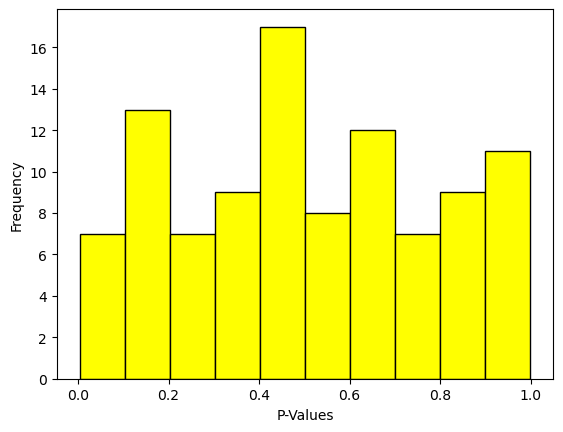

In [19]:
plt.hist(fund_p_values, color='yellow', edgecolor='black')
plt.xlabel('P-Values')
plt.ylabel('Frequency');

##### 8b) If we control Type I error for each null hypothesis at level $\alpha=0.05$, then how many null hypotheses do we reject?

In [20]:
alpha = 0.05
num_rejected = sum(fund_p_values <= alpha)

print(f"We would reject {num_rejected} null hypotheses.  Because we know all of the {num_managers} null hypotheses are true, this would mean we are making {num_rejected} Type I errors.")

We would reject 4 null hypotheses.  Because we know all of the 100 null hypotheses are true, this would mean we are making 4 Type I errors.


##### 8c) If we control the FWER at level 0.05, then how many null hypotheses do we reject?

In [21]:
bonferonni_threshold = alpha / num_managers
bonferroni_num_rejected = sum(fund_p_values <= bonferonni_threshold)

print(f"Using the Bonferroni method, we would reject {bonferroni_num_rejected} null hypotheses.  Because we know all of the {num_managers} null hypotheses are true, this would mean we are making {bonferroni_num_rejected} Type I errors.")

m = num_managers
fund_p_vals_sorted = np.sort(fund_p_values)

# thresholds = np.array([])

L = 0

for j, p_val in enumerate(fund_p_vals_sorted, 1):
    # threshold = alpha / (m + 1 -j)
    # thresholds = np.append(thresholds, threshold)
    if p_val > alpha / (m + 1 - j):
        L = j
        break

print()
print(f"Using Holm's method, we would reject {L - 1} null hypotheses.  Because we know all of the {num_managers} null hypotheses are true, this would mean we are making {L - 1} Type I errors.")

Using the Bonferroni method, we would reject 0 null hypotheses.  Because we know all of the 100 null hypotheses are true, this would mean we are making 0 Type I errors.

Using Holm's method, we would reject 0 null hypotheses.  Because we know all of the 100 null hypotheses are true, this would mean we are making 0 Type I errors.


##### 8d) If we control the FDR at level 0.05, then how many null hypotheses do we reject?

In [22]:
q = 0.05

# thresholds = np.array([])

L = 0

for j, p_val in enumerate(fund_p_vals_sorted, 1):
    # threshold = q * j / m
    # thresholds = np.append(thresholds, threshold)
    if p_val < q * j / m:
        L = j
    else:
        break
print(f"Using the Benjamini-Hochberg procedure, we would reject {L} null hypotheses.  Because we know all of the {num_managers} null hypotheses are true, this would mean we are making {L} Type I errors.")

Using the Benjamini-Hochberg procedure, we would reject 0 null hypotheses.  Because we know all of the 100 null hypotheses are true, this would mean we are making 0 Type I errors.


##### 8e) Now suppose we "cherry-pick" the 10 fund managers who perform the best in our data.  If we control the FWER for just these 10 fund managers at level 0.05, then how many null hypotheses do we reject?  If we control the FDR for just these 10 fund managers at level 0.05, then how many null hypotheses do we reject?

In [23]:
best_p_vals = fund_p_vals_sorted[0:10]
m = len(best_p_vals)

bonferonni_threshold = alpha / m
bonferroni_num_rejected = sum(best_p_vals <= bonferonni_threshold)

print(f'Using the Bonferroni method, we would reject {bonferroni_num_rejected} null hypothesis of the {m} null hypotheses we "cherry-picked".')

# thresholds = np.array([])

L = 0

for j, p_val in enumerate(best_p_vals, 1):
    # threshold = alpha / (m + 1 -j)
    # thresholds = np.append(thresholds, threshold)
    if p_val > alpha / (m + 1 - j):
        L = j
        break

print()
print(f"Using Holm's method, we would reject {L - 1} null hypothesis of the {m} null hypotheses we \"cherry-picked\".")

Using the Bonferroni method, we would reject 1 null hypothesis of the 10 null hypotheses we "cherry-picked".

Using Holm's method, we would reject 1 null hypothesis of the 10 null hypotheses we "cherry-picked".


##### 8f) Explain why the analysis in (e) is misleading.

*Hint: The standard approaches for controlling the FWER and FDR assume that* all *tested null hypotheses are adjusted for multiplicity, and that no "cherry-picking" of the smallest $p$-values has occurred.  What goes wrong if we cherry-pick?*

If we cherry-pick the 10 fund managers who perform best in our data and control the FWER and FDR, then $m=10$ and our threshold for rejecting null hypotheses will be higher than if we had performed a hypothesis test for all 100 fund managers.  If our threshold for rejecting null-hypotheses is higher, then we'll likely reject more null hypotheses as compared to if $m=100$, which would have a lower threshold.  In reality, we still will have performed 100 hypothesis tests because we would only have known which 10 fund managers performed best by first computing the $p$-values for all 100 fund managers.  As such, we may end up rejecting null hypotheses at $m=10$ that would not have been rejected when $m=100$.